**NOTE:** this notebook has NO dependencies (i.e. doesn't require the transition probabilities to be integrated). This can be a great exploration tool if figuring out new players or epsilon values to plot. 

# 1.0 Notebook Parameters

Please specify the following variables:
1. `project_directory`: your project directory path


In [23]:
# 1. Change this to the project directory path for your computer  
project_directory = '/Users/rachael/Desktop/darts-thesis'

# 2.0 Notebook Setup

Import libraries and run prerequisites.

In [24]:
# Import and configure modules from this project

import os

os.chdir(project_directory)

import function_helpers_singleplayer as h 
import function_init_board as fb 
import function_plot_board as ib
import function_init_simple_mdp as imdp

data_parameter_dir = fb.data_parameter_dir


In [25]:
# Import and configure external modules

import numpy as np
np.set_printoptions(precision=4)
np.set_printoptions(linewidth=300)
np.set_printoptions(threshold=300)

import scipy.io as sio
from scipy.stats import multivariate_normal

import math 

from matplotlib import pyplot as plt


In [26]:
# Helper functions 

def get_gaussian(x_val,y_val,error_multiplier,player_index=7):

    ## 1mm-width grid of 341*341 aiming locations (a sqaure enclosing the circle dart board)
    [xindex, yindex, xgrid, ygrid, grid_num] = fb.get_1mm_grid()

    # Get x and y points that are being aimed for
    xi = np.where(xgrid==x_val)[0][0]
    yi = np.where(xgrid==y_val)[0][0]

    # Get epsilon value 
    epsilon = error_multiplier 

    ## select the proper Gaussian distribution according to the area to which the aiming location belongs
    mu = [xgrid[xi], ygrid[yi]]
    score, multiplier = fb.get_score_and_multiplier(mu)
  
    player_parameter = sio.loadmat('./data_parameter/ALL_Model_Fits.mat')
    avg_model_t20 = sio.loadmat('./data_parameter/AVG_Model_Fits/ModelFit_T20_fixmu.mat')
    avg_model_t19 = sio.loadmat('./data_parameter/AVG_Model_Fits/ModelFit_T19_fixmu.mat')
    avg_model_t18 = sio.loadmat('./data_parameter/AVG_Model_Fits/ModelFit_T18_fixmu.mat')
    avg_model_t17 = sio.loadmat('./data_parameter/AVG_Model_Fits/ModelFit_T17_fixmu.mat')
    avg_model_b50 = sio.loadmat('./data_parameter/AVG_Model_Fits/ModelFit_B50_fixmu.mat')
    avg_model_AllDoubles = sio.loadmat('./data_parameter/AVG_Model_Fits/ModelFit_AllDoubles_fixmu.mat')
    
    if player_index=='AVG':
        mu = [xgrid[xi], ygrid[yi]]
        score, multiplier = fb.get_score_and_multiplier(mu)
        if (score==60 and multiplier==3): ##triple 20
            covariance_matrix = avg_model_t20['ModelFit_T20_fixmu'][0][0][2] * epsilon
        elif (score==57 and multiplier==3): ##triple 19
            covariance_matrix = avg_model_t19['ModelFit_T19_fixmu'][0][0][2] * epsilon
        elif (score==54 and multiplier==3): ##triple 18
            ccovariance_matrix = avg_model_t18['ModelFit_T18_fixmu'][0][0][2] * epsilon 
        elif (score==51 and multiplier==3): ##triple 17
            covariance_matrix = avg_model_t17['ModelFit_T17_fixmu'][0][0][2] * epsilon 
        elif (score==50 and multiplier==2): ##double bull
            covariance_matrix = avg_model_b50['ModelFit_B50_fixmu'][0][0][2] * epsilon 
        else:
            covariance_matrix = avg_model_AllDoubles['ModelFit_AllDoubles_fixmu'][0][0][2] * epsilon 

    else: 
  
        if (score==60 and multiplier==3): ##triple 20
            covariance_matrix = player_parameter['ModelFit_T20'][0, player_index][2] * error_multiplier
        elif (score==57 and multiplier==3): ##triple 19
            covariance_matrix = player_parameter['ModelFit_T19'][0, player_index][2] * error_multiplier
        elif (score==54 and multiplier==3): ##triple 18
            covariance_matrix = player_parameter['ModelFit_T18'][0, player_index][2] * error_multiplier
        elif (score==51 and multiplier==3): ##triple 17
            covariance_matrix = player_parameter['ModelFit_T17'][0, player_index][2] * error_multiplier
        elif (score==50 and multiplier==2): ##double bull
            covariance_matrix = player_parameter['ModelFit_B50'][0, player_index][2] * error_multiplier
        else:
            covariance_matrix = player_parameter['ModelFit_All_Doubles'][0, player_index][2] * error_multiplier
  
    return mu,covariance_matrix

def plot_gaussian(x_val,y_val,error_multiplier,player_index=7,xlim=(-200,200),ylim=(-200,200),figsize = (8,8),ax=None,title='',show_target=False):
  
  mu,covariance_matrix = get_gaussian(x_val,y_val,error_multiplier,player_index=player_index)
  rv = multivariate_normal(mu, covariance_matrix)
  
  x, y = np.mgrid[-200:200:1, -200:200:1]
  pos = np.dstack((x, y))
  
  axes = ib.plot_basic_board(xlim=xlim,ylim=ylim,figsize = figsize,axes=ax)
  
  if(show_target):
    axes.plot(x_val, y_val, "or")

  #ax.title.set_text(title)
  
  fi = axes.contourf(x, y, rv.pdf(pos), 20, cmap='Greens')


# 3.0 Sandbox 

This section allow you to plot single Gaussian distributions to understand what they look like. 

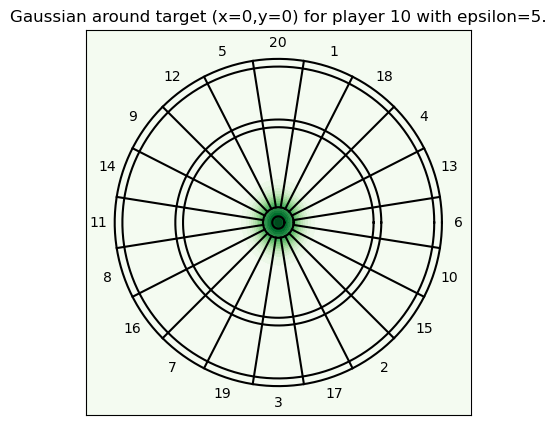

In [27]:
###################### PARAMETERS ######################
# Can change the coordinates of the aiming location 
# Defualt is (0,0) which is the bullseye

x_val=0
y_val=0

# Can change the epsilon value used 

epsilon = 5 

# Can change the base player

playerID = 10

# Change this to true if you want the target location (i.e. specified by coordinates) to be plotted in red

show_target = False 

########################################################

fig = plot_gaussian(x_val,y_val,error_multiplier=epsilon,player_index=playerID,figsize = (5,5),show_target=show_target)
fig = plt.title(f'Gaussian around target (x={x_val},y={y_val}) for player {playerID} with epsilon={epsilon}.')

# 4.0 Standard Plots

This section contains some standard views that were used for our analysis. 

## 4.1 Plot Gaussians for $\le9$ Epsilons

Default values are [1,2,3,4,5,6,7,8,9].

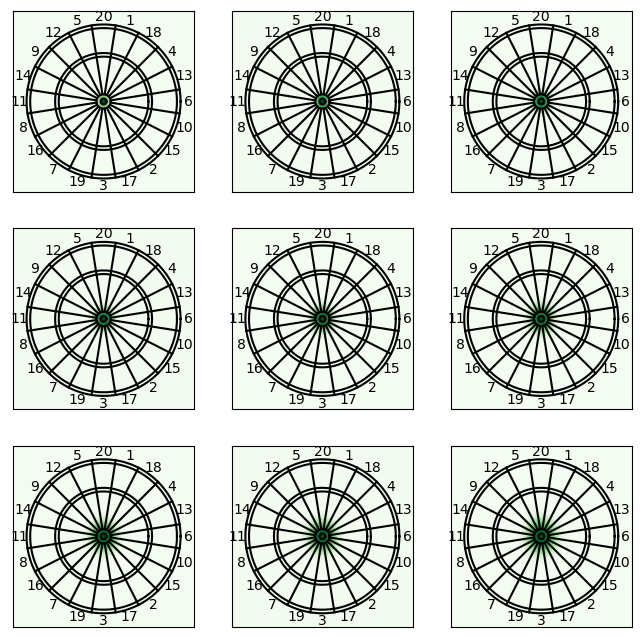

In [28]:
###################### PARAMETERS ######################
# Can change the coordinates of the aiming location 
# Defualt is (0,0) which is the bullseye

x_val=0
y_val=0

# Change list of epsilon values to plot 

epsilon_list = [1,2,3,4,5,6,7,8,9]

########################################################

cmap = 'Wistia'

fig, ax = plt.subplots(3, 3, figsize=(8,8))

for e in range(len(epsilon_list)):
    row = math.floor(e/3)
    col = e % 3
    plot_gaussian(x_val,y_val,epsilon_list[e],player_index=10,xlim=(-200,200),ylim=(-200,200),ax=ax[row,col],title='$\epsilon$={}'.format(epsilon_list[e]))
    #plt.tight_layout()

## 4.2 Plot Gaussians for Three Epsilon Values

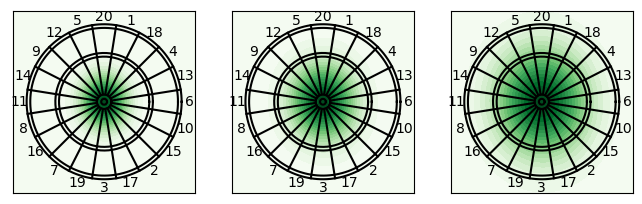

In [29]:
###################### PARAMETERS ######################
# Can change the coordinates of the aiming location 
# Defualt is (0,0) which is the bullseye

x_val=0
y_val=0

# Change list of epsilon values to plot 

epsilon_list = [25,50,100]

########################################################


cmap = 'Wistia'

fig, ax = plt.subplots(1, 3, figsize=(8,8))

for e in range(len(epsilon_list)):
    row = 0
    col = e % 3
    plot_gaussian(x_val,y_val,epsilon_list[e],player_index=10,xlim=(-200,200),ylim=(-200,200),ax=ax[col],title='$\epsilon$={}'.format(epsilon_list[e]))
    #plt.tight_layout()

## 4.3 Logarithmic Plot

Looks at how Gaussians change logarithmically in $\epsilon$.

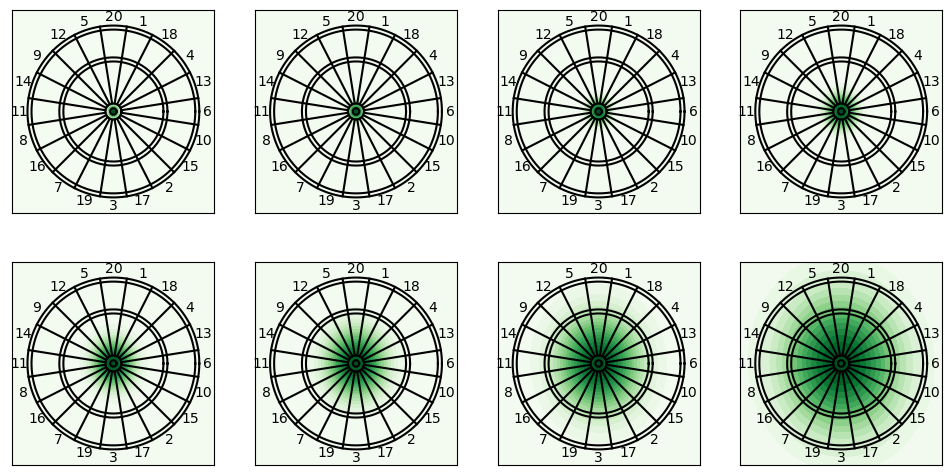

In [30]:
###################### PARAMETERS ######################
# Can change the coordinates of the aiming location 
# Defualt is (0,0) which is the bullseye

x_val=0
y_val=0

# Change list of epsilon values to plot 

epsilon_list = [1,2,4,8,16,32,64,128]

########################################################

fig, ax = plt.subplots(2, 4,figsize=(12,6))

for e in range(len(epsilon_list)):
    row = 0 if e <4 else 1
    col = e % 4 
    plot_gaussian(x_val,y_val,epsilon_list[e],player_index=10,xlim=(-200,200),ylim=(-200,200),ax=ax[row,col],title='$\epsilon$={}'.format(epsilon_list[e]))
    

## 4.4 Plot Gaussians for Different Players

The players should be indexed in alphabetical order. Can use the following legend. 

    0 --> Anderson G	  
    1 --> Aspinall	  
    2 --> Chisnall	  
    3 --> Clayton	  
    4 --> Cross	  
    5 --> Cullen	  
    6 --> van Gerwen	  
    7 --> Gurney	  
    8 --> Lewis A	      
    9 --> Price	  
    10 --> Smith M	    
    11 --> Suljovic	    
    12 --> Wade	  
    13 --> White	  
    14 --> Whitlock	  
    15 --> Wright

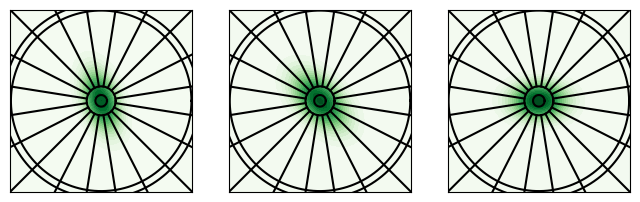

In [31]:
###################### PARAMETERS ######################
# Can change the coordinates of the aiming location 
# Defualt is (0,0) which is the bullseye

x_val=0
y_val=0

# Can change the epsilon value used (to make the trend more or less visible)

epsilon = 5 

# Can change the players involved 

player_list = [5,2,9]
names = ['Cullen','Chisnall','Price']

########################################################

cmap = 'Wistia'

fig, ax = plt.subplots(1, 3, figsize=(8,8))

for p in range(len(player_list)):
    row = 0
    col = p % 3
    plot_gaussian(x_val,y_val,epsilon,player_index=player_list[p],xlim=(-100,100),ylim=(-100,100),ax=ax[col],title=names[p])
    #plt.tight_layout()

# 5.0 Aiming Locations Used in MDP

Below is a plot of all aiming locations for player "throws" (i.e. not credits) used in the subsequent MDP models. 

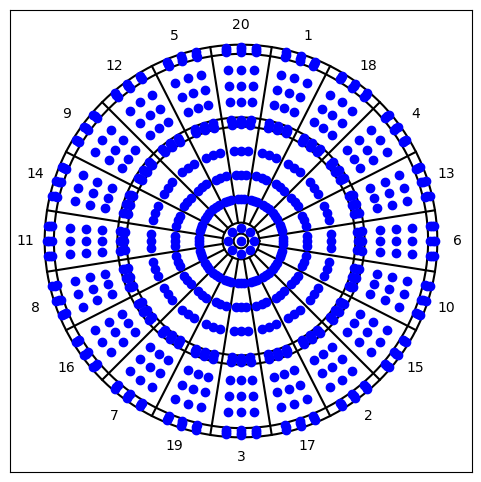

In [32]:
axes = ib.plot_basic_board(figsize = (6,6))

figure = plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

for a in imdp.a_throw_list:

    coords = imdp.actions[a]['coords']
    x = coords[0]
    y = coords[1]

    axes.plot( x , y , "ob")

#figure = plt.title("Set of Action Throw Targets Considered for MDP")


# 6.0 Basic Board Plot

Below is the code that can be used to plot a blank board.

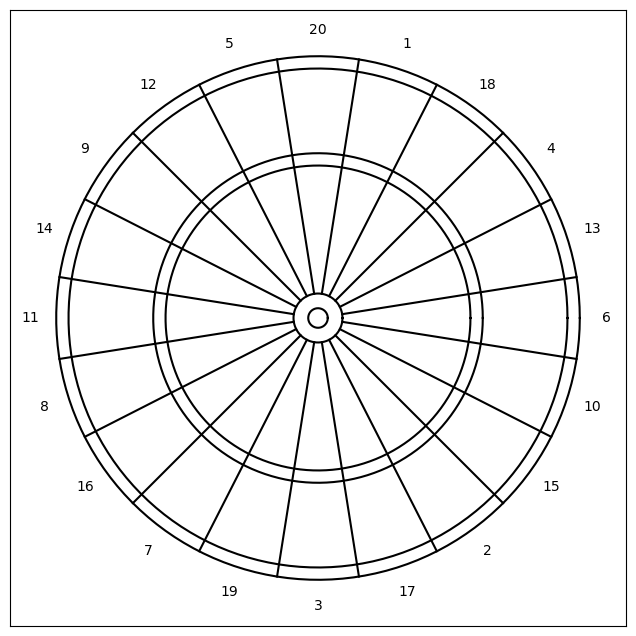

In [33]:
ax = ib.plot_basic_board()